In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


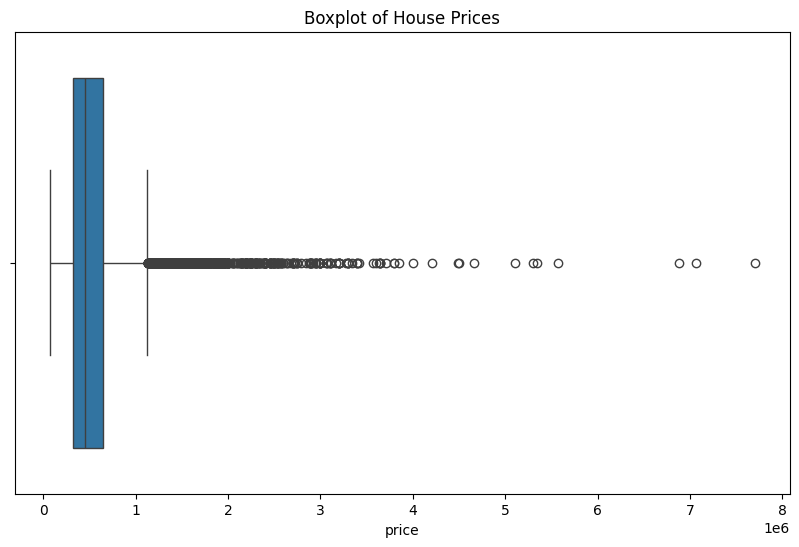

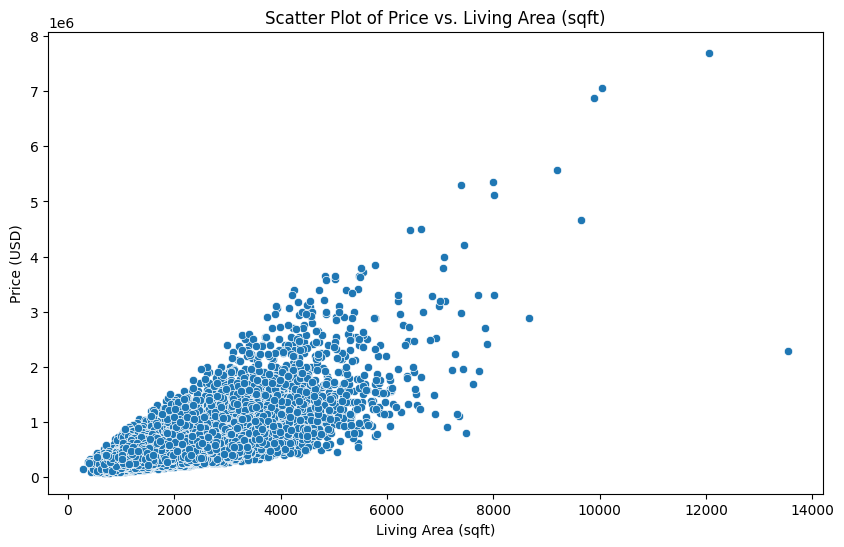

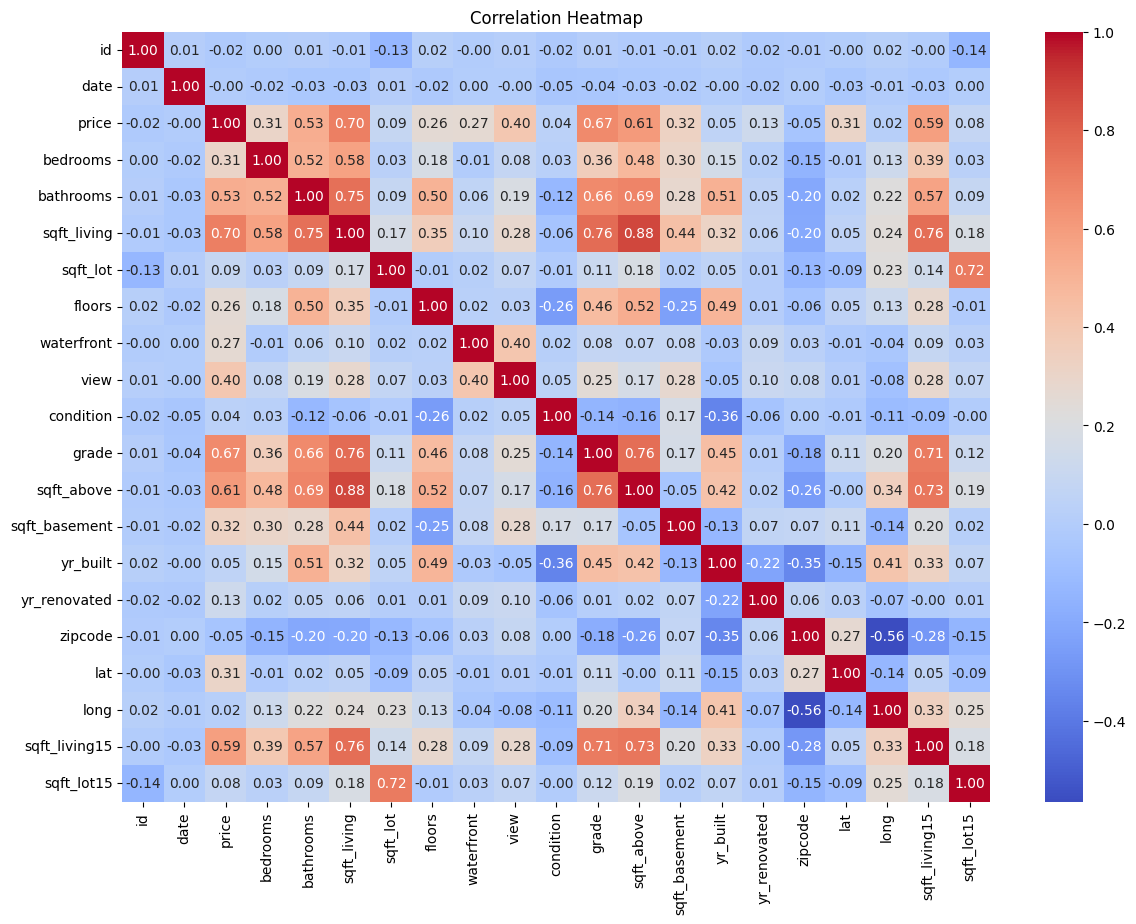

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the path to your file
file_path = '/content/drive/MyDrive/shiva/kc_house_data.csv'

# Read the CSV file into a DataFrame
houses = pd.read_csv(file_path)
houses['date']=pd.to_datetime(houses['date'])

# Boxplot for price
plt.figure(figsize=(10, 6))
sns.boxplot(x=houses['price'])
plt.title('Boxplot of House Prices')
plt.show()

# Scatter plot for price vs sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x=houses['sqft_living'], y=houses['price'])
plt.title('Scatter Plot of Price vs. Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

# Correlation plot
plt.figure(figsize=(14, 10))
sns.heatmap(houses.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [4]:
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'yr_renovated']

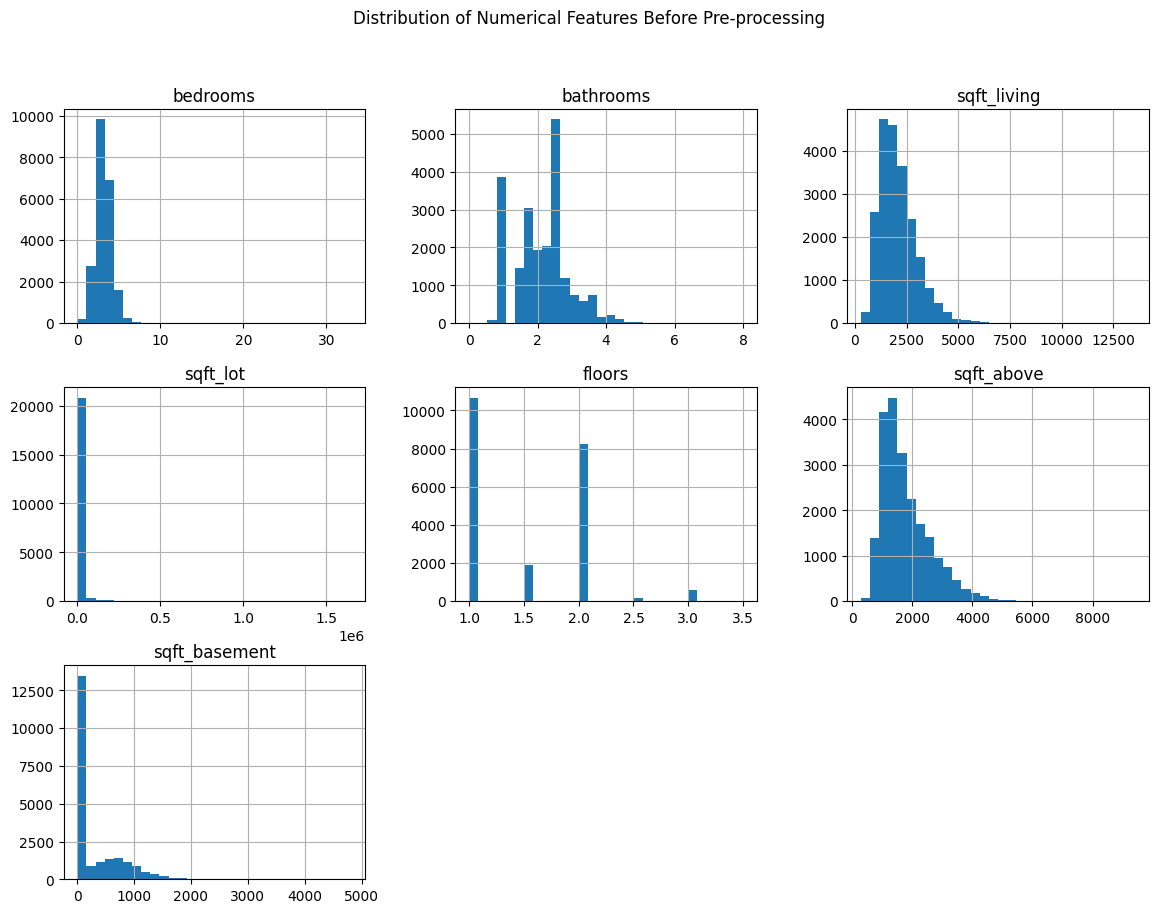

In [5]:
# Distribution of numerical features before preprocessing
houses[numeric_features].hist(bins=30, figsize=(14, 10))
plt.suptitle('Distribution of Numerical Features Before Pre-processing')
plt.show()

In [6]:
# Check for missing values
missing_values = houses.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values[missing_values > 0])


Missing Values in Dataset:
Series([], dtype: int64)


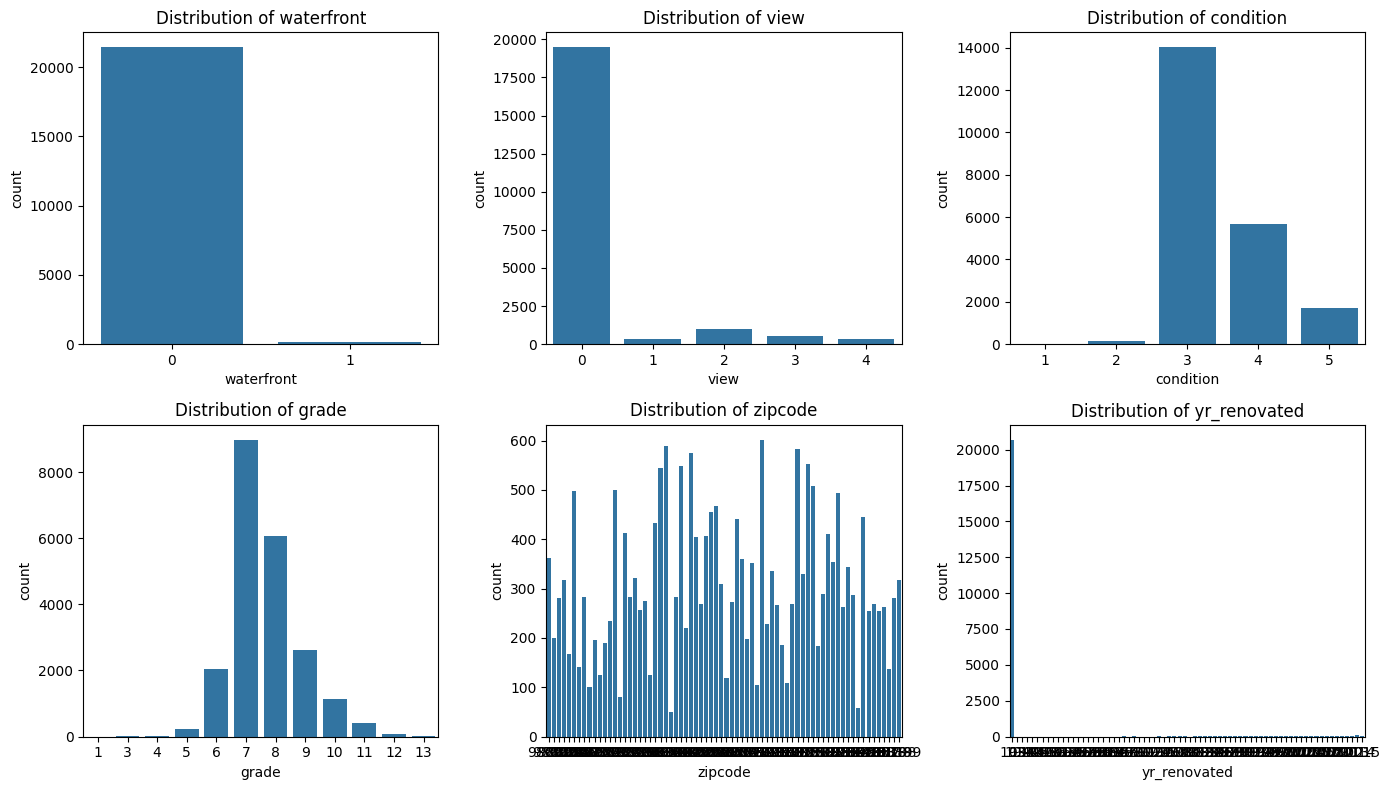

In [7]:
# Distribution of categorical features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=feature, data=houses)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature engineering: Create a new feature - house age
houses['age'] = 2024 - houses['yr_built']
houses['renovated'] = houses['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Define features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'age', 'renovated']
target = 'price'

X = houses[features]
y = houses[target]

# Preprocessing: Scaling and encoding
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'age']
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'renovated']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



In [9]:
# Data splitting functions
def split_data(X, y, test_size):
    return train_test_split(X, y, test_size=test_size, random_state=42)

splits = {
    '80:20': split_data(X, y, 0.2),
    '70:30': split_data(X, y, 0.3),
    '60:40': split_data(X, y, 0.4)
}


In [10]:
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = []

# Training and evaluation
for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'Split': split_name,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)


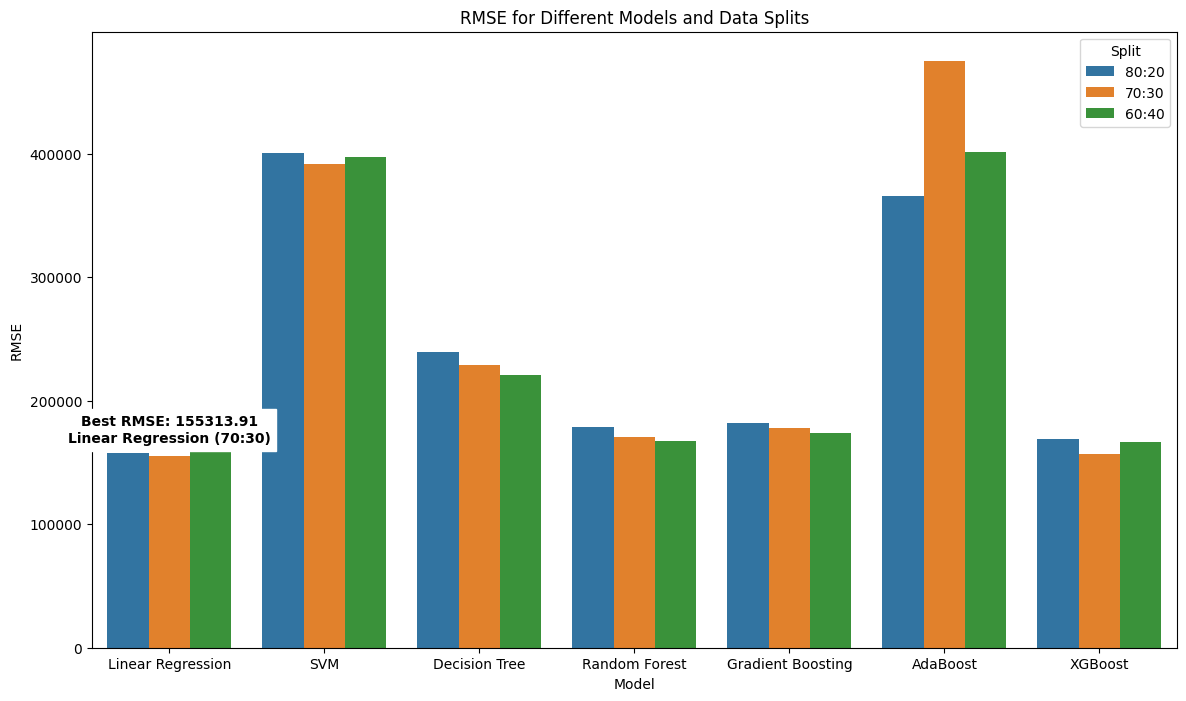

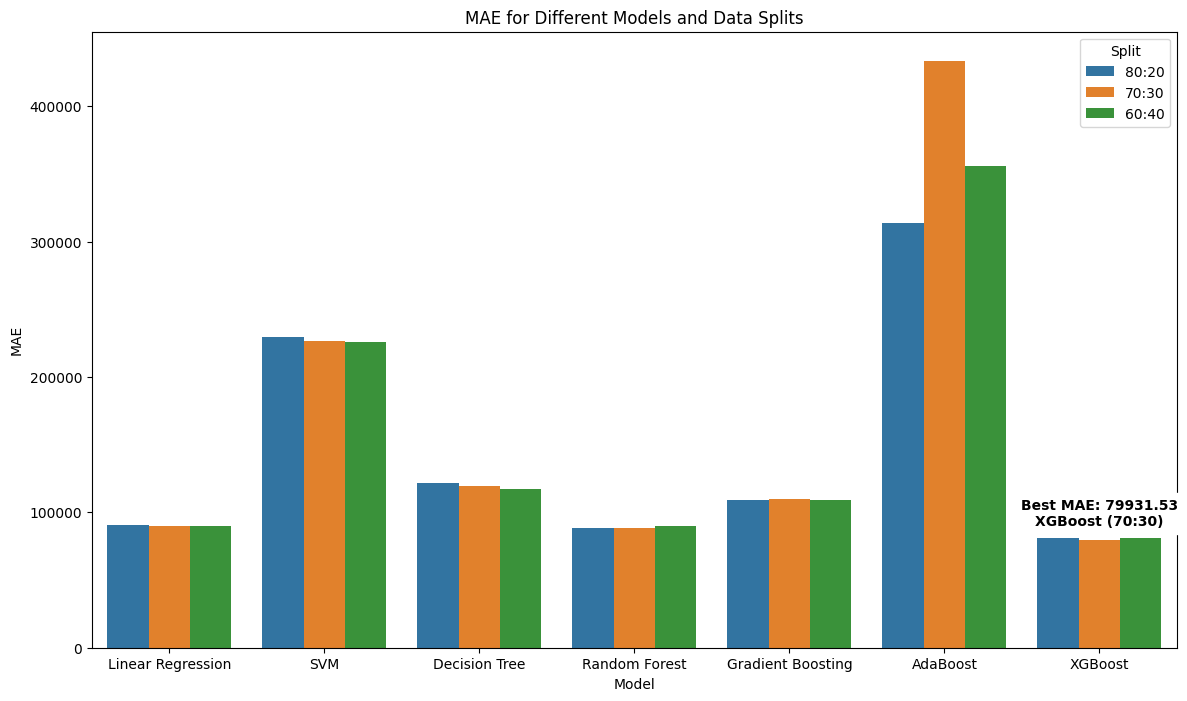

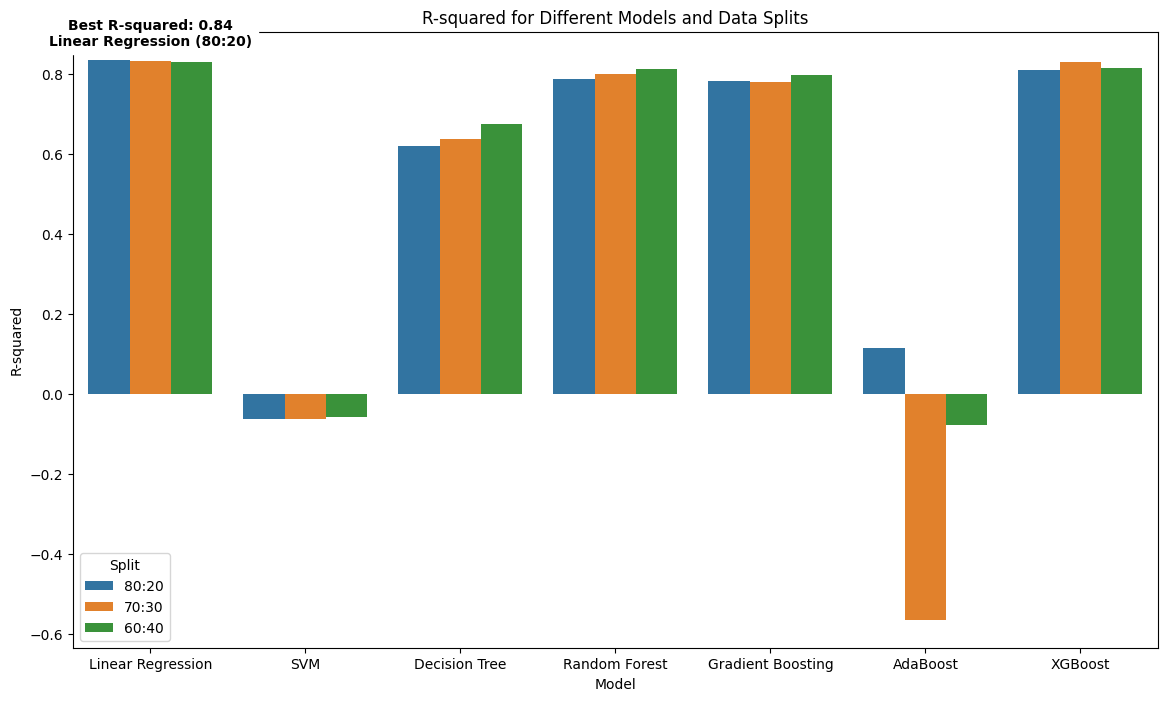

,Split,Model,RMSE,MAE,R-squared
0,80:20,Linear Regression,157672.520311,90971.360881,0.835553
1,80:20,SVM,400884.911341,229297.512909,-0.063052
2,80:20,Decision Tree,239587.147226,121997.125607,0.620299
3,80:20,Random Forest,179126.954428,88485.913707,0.787755
4,80:20,Gradient Boosting,181762.377034,109472.177761,0.781464
5,80:20,AdaBoost,365640.674153,313792.657476,0.115650
6,80:20,XGBoost,169391.508337,81297.639430,0.810199
7,70:30,Linear Regression,155313.910965,89825.709303,0.832909
8,70:30,SVM,391396.905971,226477.123768,-0.061129
9,70:30,Decision Tree,229109.256234,119178.880886,0.636404


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to annotate the best metric
def annotate_best_metric(ax, metric, results_df):
    best_value = results_df[metric].min() if metric in ['RMSE', 'MAE'] else results_df[metric].max()
    best_row = results_df[results_df[metric] == best_value].iloc[0]
    text = f"Best {metric}: {best_value:.2f}\n{best_row['Model']} ({best_row['Split']})"

    ax.annotate(
        text,
        xy=(best_row['Model'], best_value),
        xytext=(0, 10),
        textcoords="offset points",
        ha='center',
        color='black',
        fontsize=10,
        weight='bold',
        backgroundcolor='white'
    )

# Visualization of RMSE
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='RMSE', hue='Split', data=results_df)
plt.title('RMSE for Different Models and Data Splits')
plt.ylabel('RMSE')
annotate_best_metric(ax, 'RMSE', results_df)
plt.show()

# Visualization of MAE
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='MAE', hue='Split', data=results_df)
plt.title('MAE for Different Models and Data Splits')
plt.ylabel('MAE')
annotate_best_metric(ax, 'MAE', results_df)
plt.show()

# Visualization of R-squared
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='R-squared', hue='Split', data=results_df)
plt.title('R-squared for Different Models and Data Splits')
plt.ylabel('R-squared')
annotate_best_metric(ax, 'R-squared', results_df)
plt.show()
results_df

In [12]:
import joblib

# Find the best model based on R-squared
best_model_row = results_df.loc[results_df['R-squared'].idxmax()]
best_model_name = best_model_row['Model']
best_split_name = best_model_row['Split']

# Retrieve the best model
best_split = splits[best_split_name]
X_train_best, X_test_best, y_train_best, y_test_best = best_split
X_train_best = preprocessor.fit_transform(X_train_best)
X_test_best = preprocessor.transform(X_test_best)

best_model = models[best_model_name]
best_model.fit(X_train_best, y_train_best)

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

print(f"The best model ({best_model_name}) trained on {best_split_name} split is saved as 'best_model.pkl'.")

The best model (Linear Regression) trained on 80:20 split is saved as 'best_model.pkl'.
